## Описание проекта

Заказчик исследования - магазин компьютерных игр, продающий игры по всему миру.

Поставлена цель выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

Из открытых источников получены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Период данных до 2016 года.

Набор данных представляет собой список игр со столбцами: название игры, платформа, год выпуска, жанр, столбцы с продажами по регионам (Северная Америка, Европа, Япония, другие страны), оценки критиков (до 100) и оценка пользователей (до 10), а также рейтинг

Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

План исследования:
1. Загрузка файла с данными и изучение общей информации
2. Подготовка данных (проверка типов данных, пропусков, дубликатов, добавление столбца с суммарными продажами)
3. Исследовательский анализ данных:
* построение гистограмм распределения выпуска игр по годам
* отбор платформ с наибольшими суммарными продажами, определение срока жизни платформ
* определение актуального периода исследования
* выявление потенциально прибыльных платформ
* построение боксплота по глобальным продажам игр в разбивке по платформам
* оценка влияния на продажи внутри одной популярной платформы отзывы пользователей и критиков (диаграмма рассеяния и расчет корреляции между отзывами и продажами).
* Построить график общего распределения продаж игр по жанрам.
* Выводы по разделу
4.Составление портрета пользователя каждого региона
* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5).
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?
* Описание портрета пользователя каждого региона
5. Общий вывод

## Предобработка данных

In [ ]:
# В самой первой ячейке добавим код для тех библиотек, которых нет в окружении тренажера
!pip install jupyter-black

     |████████████████████████████████| 1.8 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 2.0 MB/s  eta 0:00:01
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3


In [ ]:
# Импортируем необходимые библиотеки
import jupyter_black
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import warnings

from scipy.stats import kendalltau

In [ ]:
# Загрузка автоформатера
jupyter_black.load()

# Скроем лишние предупреждения
warnings.filterwarnings("ignore")

# Настройки Pandas для вывода всех столбцов
pd.set_option("display.max_columns", None)

# Ограничение количества знаков после запятой
pd.set_option("display.float_format", "{:.2f}".format)

# Установка максимального количества строк для отображения
pd.set_option("display.max_rows", 50)

# Установка ширины колонок
pd.set_option("display.max_colwidth", 100)

# Установка ширины дисплея
pd.set_option("display.width", 1000)

### Обзор файла с данными

In [ ]:
# Загрузим данные из источника
data = pd.read_csv("/datasets/games.csv")

In [ ]:
# Посмотрим первые пять строк
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Первое, что обращает на себя внимание - в названиях столбцов используются верхние и нижние регистры, нужно привести к стилю snake_case.

В ячейках встречаются пропуски. Исследуем их в дальшейшем.

In [ ]:
# Преобразование имен столбцов в нижний регистр
data.columns = data.columns.str.lower()
# Проверим исправление и посмотрим краткую информацию структуры фрейма данных.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# Проверим исправление и посмотрим краткую информацию структуры фрейма данных.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего 16715 строк, 10 столбцов.

Столбцы name, year_of_release, genre, critic_score, user_score, rating имеют пропуски значений.


Столбцы name, platform, genre, user_score и rating имеют тип данных object.

Столбец year_of_release имеет тип float64, следует преобразовать в формат дат (или в тип int).

Столбцы user_score представлен как object, нужно преобразовать в численный тип float, тк оценки выражены дробными числами.

### Пропуски и типы данных

In [ ]:
# Для начала вычислим количество пропусков и процент пропусков, объединим данные в одну таблицу
num_missing = data.isna().sum()
percent_missing = (data.isna().sum() / len(data)).round(4) * 100
summary_table = pd.concat([num_missing, percent_missing], axis=1)
summary_table.columns = ["Количество пропусков", "Процент пропусков"]
print(summary_table)

                 Количество пропусков  Процент пропусков
name                                2               0.01
platform                            0               0.00
year_of_release                   269               1.61
genre                               2               0.01
na_sales                            0               0.00
eu_sales                            0               0.00
jp_sales                            0               0.00
other_sales                         0               0.00
critic_score                     8578              51.32
user_score                       6701              40.09
rating                           6766              40.48


In [ ]:
# Посчитаем количество явных дубликатов
print("Количество явных дубликатов:", data.duplicated().sum())

Количество явных дубликатов: 0


In [ ]:
# Проверим данные на неявные дубликаты
duplicates = data.duplicated(subset=["name", "platform", "year_of_release"], keep=False)

# Вывод строк с неявными дубликатами
data[duplicates]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.00,Sports,2.11,0.22,0.00,0.23,83.00,5.5,E
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.00,Sports,0.00,0.01,0.00,0.00,83.00,5.5,E


Нашлись две дублирующиеся строки с отличающимися данными в столбцах продаж. Вероятнее всего, они образовались в процессе сбора информации.

Строки 659/14244 с Nan в столбце name удаляются кодом ниже, после вывода строк с пропущенными значениями в name.

Строки 604/16230 отличаются друг от друга только данными по продажам, причем строка 16230 имеет нулевые значения продаж, кроме столбца eu_sales (0.01). Если бы в них были значимые цифры, можно было бы суммировать продажи по соответсвующим столбцам, но значение в 0.01 крайне мало, можно удалить строку 16230 без потерь в данных.

In [ ]:
# Удалим строку с индексом 16230
data = data.drop(index=16230)

# Сбросим индексы после удаления
data.reset_index(drop=True, inplace=True)

In [ ]:
# Посмотрим пропущенные значения в столбце name
data[data["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Поскольку в выведенных двух строках кроме отсутствия данных о названии игры, нет данных о платформе, оценках критиков и пользователей, эти строки нужно удалить как неинформативные (это незначительное количество не повлияет на исходные данные).

In [ ]:
# Удалим строки с пропусками
data = data.dropna(subset=["name"])
# Проверим количество пропусков в столбце
print("Количество пропусков:", data["name"].isna().sum())

Количество пропусков: 0


In [ ]:
# Посмотрим пропущенные значения в столбце year_of_release
data[data["year_of_release"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16372,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.00,tbd,E10+
16404,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.00,6.5,T
16447,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.00,6.7,M
16457,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Год выпуска - одна из ключевых характеристик, данные важны для анализа.

Трудно выявить причину пропусков, она может быть как технического характера, так и человеческим фактором.

В названиях некоторых названий содержится год выпуска, его можно было бы выделить и заполнить им столбец с годом, но пропусков в столбце year_of_release всего 269, это 1.61% от общего количества данных, потому их можно смело удалить.

In [ ]:
# Удалим строки с пропусками
data = data.dropna(subset=["year_of_release"])
# Проверим количество пропусков в столбце
print("Количество пропусков:", data["year_of_release"].isna().sum())

Количество пропусков: 0


In [ ]:
# Посмотрим пропущенные значения в столбце critic_score
data[data["critic_score"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.00,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16709,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16711,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16712,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски в столбце critic_score сочетаются с пропусками в столбцах user_score и rating. Они могут быть результатом ошибок при вводе данных или при сборе информации.

По данным из таблицы выше пропусков в этих столбцах от 40 до 54%, это очень большое количество для удаления. Замену для заполнения подобрать не представляется возможным - медиана или среднее может сильно исказить результаты исследования. Оставим пока, как есть.

Дополнительно рассмотрим столбец rating, тк он содержит категориальные данные.

In [ ]:
data["rating"].value_counts()

E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Данные относятся к классификации игр по рейтингам, которые обозначают возрастные ограничения. Вот краткое объяснение значений:

E (Everyone): Подходит для всех возрастов.

T (Teen): Подходит для подростков от 13 лет и старше.

M (Mature): Подходит для взрослых от 17 лет и старше.

E10+ (Everyone 10 and older): Подходит для всех от 10 лет и старше.

EC (Early Childhood): Подходит для детей младшего возраста.

K-A (Kids to Adults): Ранее использовался для обозначения игр, подходящих для детей и взрослых. Этот рейтинг был заменен на E10+.

AO (Adults Only): Подходит только для взрослых.

RP (Rating Pending): Рейтинг еще не присвоен. Игра находится в процессе оценки.

In [ ]:
# Рейтинги E10+ и K-A равнозначные, следует привести к одному (более позднему) виду - E10+.
data["rating"] = data["rating"].replace("K-A", "E10+")
# RP - рейтинг не присвоен, корректнее будет заменить его на Nan
data["rating"] = data["rating"].replace("RP", np.nan)
# Проверим
data["rating"].value_counts()

E       3920
T       2905
M       1536
E10+    1396
EC         8
AO         1
Name: rating, dtype: int64

In [ ]:
# Посмотрим уникальные значения ячеек столбца user_score
data["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо цифровых показателей, есть обозначение отсутвующих данных nan, а также tbd - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить Соответсвенно, можно заменить эту аббревиатуру на Nan.


In [ ]:
# Посчитаем, сколько раз встречается значение tbd
print("Количество значений tbd:", (data["user_score"] == "tbd").sum())
# Еще раз выведем количество пропусков
print("Количество пропусков:", data["user_score"].isna().sum())

Количество значений tbd: 2376
Количество пропусков: 6605


Большой объем данных не имеет значения оценки пользователей. Заполнение их средним или медианой может не дать адекватного представления о данных, так как это приведет к потере вариации и может создать ложное впечатление о распределении данных. Потому пропуски оставляем как есть, но значение tbd следует заменить на Nan

In [ ]:
# Замена значений 'tbd' на NaN в столбце 'user_score'
data["user_score"] = data["user_score"].replace("tbd", np.nan)

In [ ]:
# Проверим
data["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Теперь, когда удалена часть пропусков, можно поменять типы данных в столбцах.

Столбец year_of_release имеет тип float64, следует преобразовать в формат дат (или в численный тип).

Столбцы user_score представлен как object, нужно преобразовать в численный тип float, тк оценки выражены дробными числами.

In [ ]:
# Приведем столбец year_of_release к типу int
data["year_of_release"] = data["year_of_release"].astype(int)
# Приведем столбец user_score к типу float
data["user_score"] = data["user_score"].astype(float)
# Проверим изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9766 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
# Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
data["total_sales"] = = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


*Предварительные выводы*

Обзор данных проведен, выявлены пропуски, несоответсвующие значениям типы данных.
Исправлены названия столбцов, типы данных нескольких значений, изучены данные на предмет пропусков. Добавлен столбец в суммарными продажами по всем регионам.

In [ ]:
# Посмотрим, что осталось
temp = data.copy()
list_c = [
    "name",
    "platform",
    "year_of_release",
    "genre",
    "critic_score",
    "user_score",
    "rating",
]
print(temp.info())
for col_l in list_c:
    print("-" * 25)
    print(col_l, temp[col_l].sort_values().unique())
    print(
        col_l,
        ": кол-во NaN",
        temp[col_l].isna().sum(),
        ", процент NaN",
        round(temp[col_l].isna().mean() * 100, 2),
        "%",
    )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16713
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9766 non-null   object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

Пропуски могут означать то, что некоторые игры были выпущены до введения системы рейтингов в 1994 году; не проходили официальную оценку ESRB по другим причинам (выбор разработчиков, особенности игры или её распространения (неофициальный или учебный проект)).
    
Кроме того, ESRB устанавливает рейтинг в США и Канаде, в других странах используются свои системы, например, большинстве европейских стран используется PEGI, в Японии - CERO. Одни и те же игры могут иметь отличающиеся рекомендации в зависимости от региона. Потому несколько некорректно выяснять зависимость продаж от рейтинга, используя рейтинг одной страны применительно к продажам по всему миру.



## Исследовательский анализ данных

### Определение периода исследования и время жизни платформ

Посмотрим, сколько игр выпускалось в разные годы. Определим, важны ли данные за все периоды.


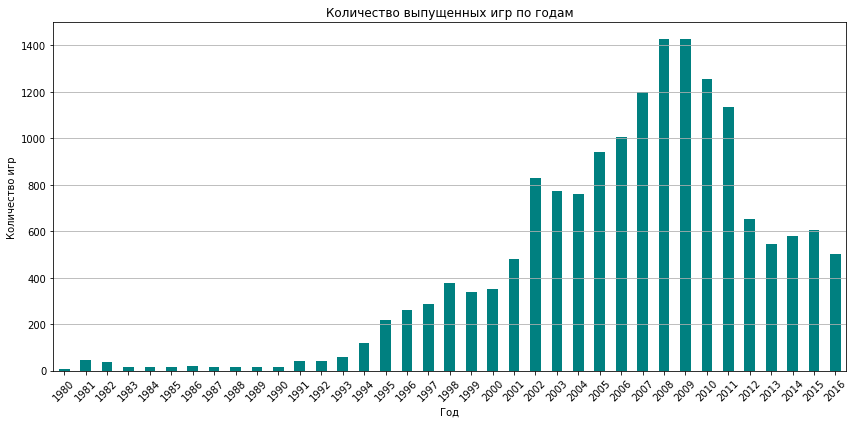

In [ ]:
# Подсчитаем количество выпущенных игр по годам
games_per_year = data["year_of_release"].value_counts().sort_index()

# Построим график
plt.figure(figsize=(12, 6))
games_per_year.plot(kind="bar", color="teal")

# Настроим заголовки и метки
plt.title("Количество выпущенных игр по годам")
plt.xlabel("Год")
plt.ylabel("Количество игр")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

По графику видно, что в период с 1980 по 1993 год количество выпускаемых игр было примерно одинаковым. С 1994 года наблюдался бурный рост количества новых игр. После 2009 года количество игр стало значительно уменьшаться.

Данные за все периоды не являются важными, тк во многом зависят от актуальности платформы.

Посмотрим, как менялись продажи по платформам.
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

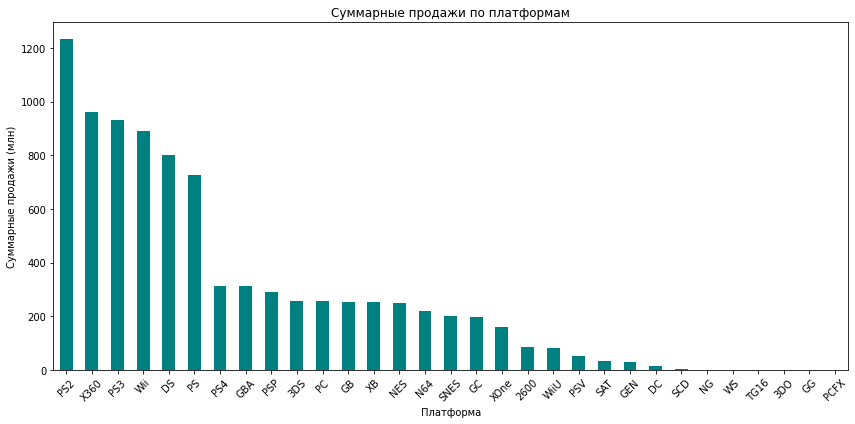

In [ ]:
# Сгруппируем данные
sales_by_platforms = (
    data.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
)

# Построим график
plt.figure(figsize=(12, 6))
sales_by_platforms.plot(kind="bar", color="teal")

# Настроим заголовки и метки
plt.title("Суммарные продажи по платформам")
plt.xlabel("Платформа")
plt.ylabel("Суммарные продажи (млн)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Наглядно видно, что лидерами по продажам являются платформы PS2, X360, PS3, Wii, DS, PS.

Определим,  за какой характерный срок появляются новые и исчезают старые платформы.

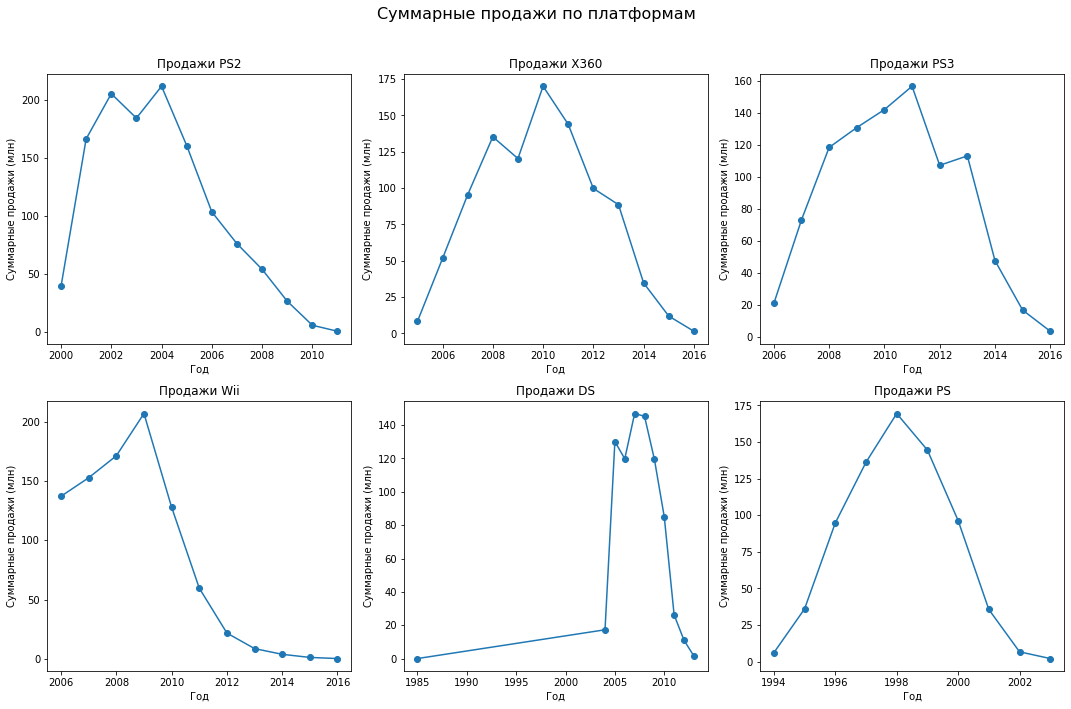

In [ ]:
# Подсчитаем суммарные продажи по платформам
sales_by_platform = data.groupby("platform").sum("total_sale").reset_index()

# Отберем 6 платформ-лидеров по продажам
top_platforms = sales_by_platform.sort_values(by="total_sales", ascending=False).head(6)

# Отфильтруем данные для выбранных платформ
filtered_data = data[data["platform"].isin(top_platforms["platform"])]

# Посчитаем суммарные продажи по годам для выбранных платформ
total_sales_by_year = (
    filtered_data.groupby(["year_of_release", "platform"])
    .sum(numeric_only=True)
    .reset_index()
)
# Создадим фигуры с субплотами
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Упрощение доступа к осям
axs = axs.flatten()

# Построим графики для каждой платформы
for i, platform in enumerate(top_platforms["platform"]):
    platform_data = total_sales_by_year[total_sales_by_year["platform"] == platform]
    axs[i].plot(
        platform_data["year_of_release"],
        platform_data["total_sales"],
        marker="o",
    )
    axs[i].set_title(f"Продажи {platform}")
    axs[i].set_xlabel("Год")
    axs[i].set_ylabel("Суммарные продажи (млн)")

# Зададим заголовок
plt.suptitle("Суммарные продажи по платформам", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

По графикам отслеживается период от роста до падения продаж:
- PS2 c 2000 по 2010;
- X360 c 2005 по 2016;
- PS3 с 2005 по 2016
- Wii с 2006 по 2026
- PS с 1994 по 2003

На графике продаж DS выявлена аномалия в данных - продажи в 1985 году, что не соответсвует действительности, тк, по данным поисковых систем: "Оригинальная Nintendo DS (Blue edition) была выпущена в 2004 году". Это явная ошибка в данных, которую не следует принимать во внимание. Таким образом, период продаж DS примерно с 2004 по 2014 года


За актуальный для исследования период следует брать последние 3 года, тк в силу интенсивности развития игровой отрасли актуальность платформ может быстро теряться.

Вычислим срок жизни платформы. На него оказывают влияние масса факторов - технологические изменения и поддержка разработчиков, спрос и конкуренция. Фаза роста спроса выглядит более резкой, а фаза спада - более пологой.

In [ ]:
# Вычислим срок жизни платформы
temp = data.copy()
time_life = temp.pivot_table(
    index="platform", values="year_of_release", aggfunc=["min", "max"]
).reset_index()
time_life["life"] = (
    time_life["max"] - time_life["min"] + 1
)  # в срок жизни платформы, должны входить границы диапазона,
# поэтому +1
time_life["life"].median()

7.0

Медиана срока жизни платформы составляет 7 лет

Определим, какие платформы лидируют по продажам в актуальный период, растут или падают, и выберем несколько потенциально прибыльных платформ.

За актуальный для исследования период возьмем последние 3 года, тк в силу интенсивности развития игровой отрасли актуальность платформ может быстро теряться.

In [ ]:
# Ограничим временной промежуток исследования 2014-2016 годами
actual_data = data.query("year_of_release > 2013")

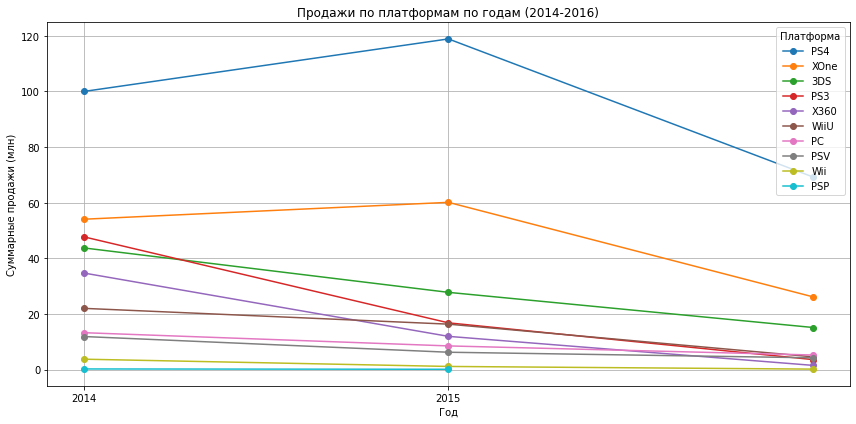

In [ ]:
# Подсчитаем суммарные продажи по платформам
sales_by_platform = (
    actual_data.groupby("platform")["total_sales"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Подсчитаем суммарные продажи по годам для выбранных платформ
total_sales_by_year = (
    actual_data.groupby(["year_of_release", "platform"])["total_sales"]
    .sum()
    .reset_index()
)

# Построение графика
plt.figure(figsize=(12, 6))
for platform in sales_by_platform["platform"]:
    platform_data = total_sales_by_year[total_sales_by_year["platform"] == platform]
    plt.plot(
        platform_data["year_of_release"],
        platform_data["total_sales"],
        marker="o",
        label=platform,
    )

# Настройка заголовка и меток
plt.title("Продажи по платформам по годам (2014-2016)")
plt.xlabel("Год")
plt.ylabel("Суммарные продажи (млн)")
plt.xticks(platform_data["year_of_release"].unique())  # Установка меток по оси X
plt.legend(title="Платформа")
plt.grid()
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()

График наглядно демонстрирует спад продаж всех платформ видеоигр, однако, нужно учитывать, что данные за 2016 год могут быть неполными, и есть ли на самом деле спад, стоит проверить, когда будут доступны полные данные за 2016 год. Между тем, в 2015 году демонстрируют рост продаж две платформы - PS4 и XOne. Их однозначно следует рассматривать как наиболее перспективные для продвижения.

### Боксплоты по продажам игр в разбивке по платформам

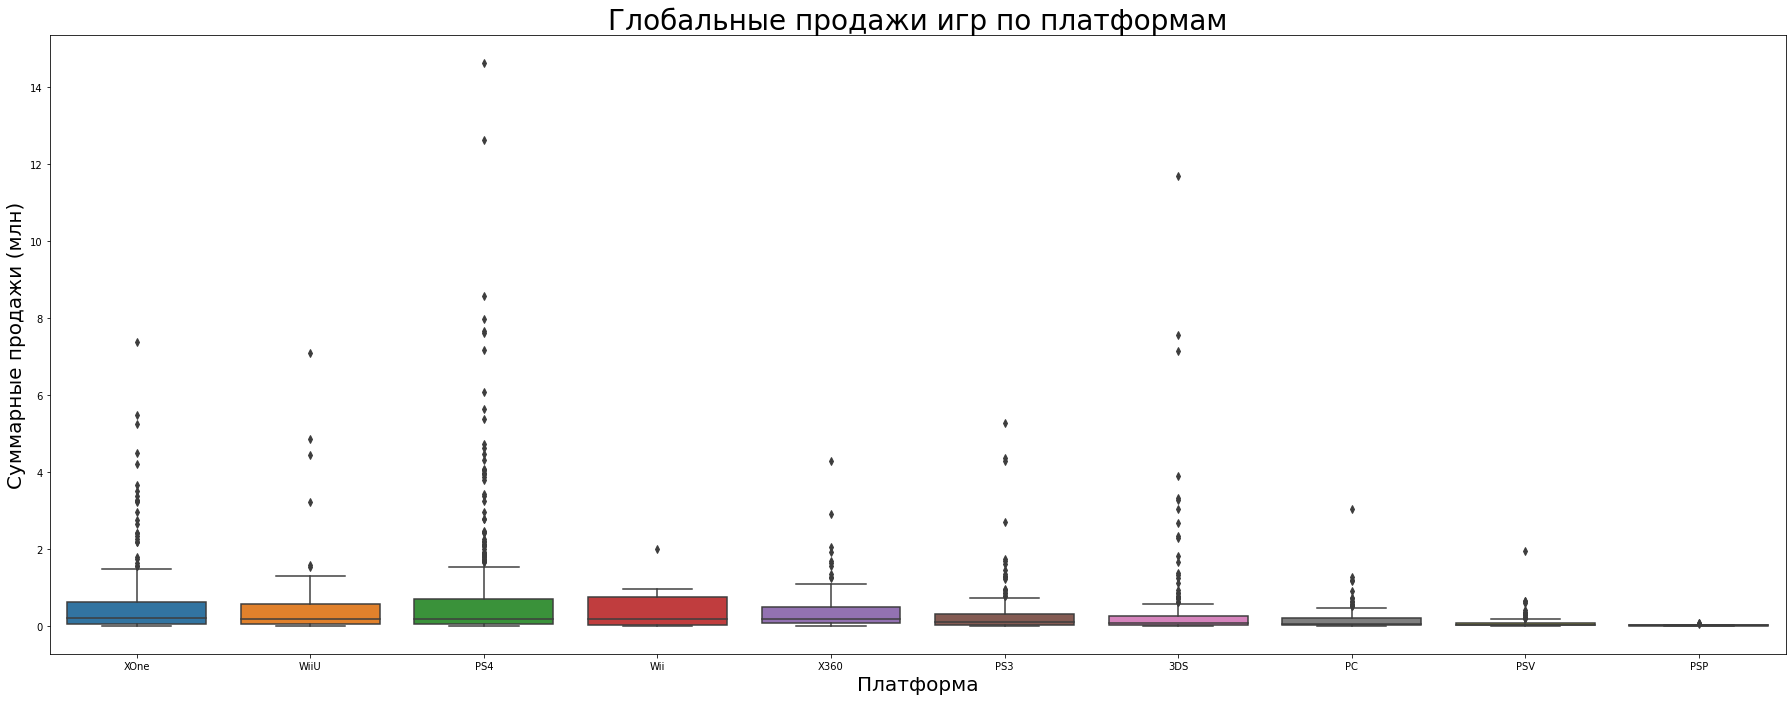

In [ ]:
# Построим график боксплот по суммарным продажам игр в разбивке по платформам
grouped = actual_data.groupby(["platform"])
order = grouped.median()["total_sales"].sort_values(ascending=False).index

plt.figure(figsize=(25, 10))
sns.boxplot(x="platform", y="total_sales", data=actual_data, order=order)

# Настроим заголовок и метки
plt.title("Глобальные продажи игр по платформам", fontsize=28)
plt.suptitle("")  # Убираем стандартный заголовок
plt.rc("xtick", labelsize=20)
plt.rc("ytick", labelsize=20)
plt.xlabel("Платформа", fontsize=20)
plt.ylabel("Суммарные продажи (млн)", fontsize=20)

plt.tight_layout()  # Настроим отступы
plt.show()

In [ ]:
# Отфильтруем выбросы
# actual_data = actual_data.query("total_sales < 1.5")
# grouped = actual_data.groupby(["platform"])
# Вычислим медианы продаж по каждой платформе и отсортируем в порядке убывания
# order = grouped.median()["total_sales"].sort_values(ascending=False).index
# Построим график боксплот по суммарным продажам игр в разбивке по платформам
# plt.figure(figsize=(25, 12))
# sns.boxplot(x="platform", y="total_sales", data=actual_data, order=order)

# Настроим заголовки и метки
# plt.title("Глобальные продажи игр по платформам", fontsize=28)
# plt.suptitle("")  # Убираем стандартный заголовок
# plt.rc("xtick", labelsize=20)
# plt.rc("ytick", labelsize=20)
# plt.xlabel("Платформа", fontsize=20)
# plt.ylabel("Суммарные продажи (млн)", fontsize=20)

# plt.tight_layout()  # Настроим отступы
# plt.show()

#На графике видны многочисленные выбросы, отсечем их на уровне продаж в 1,5млн.

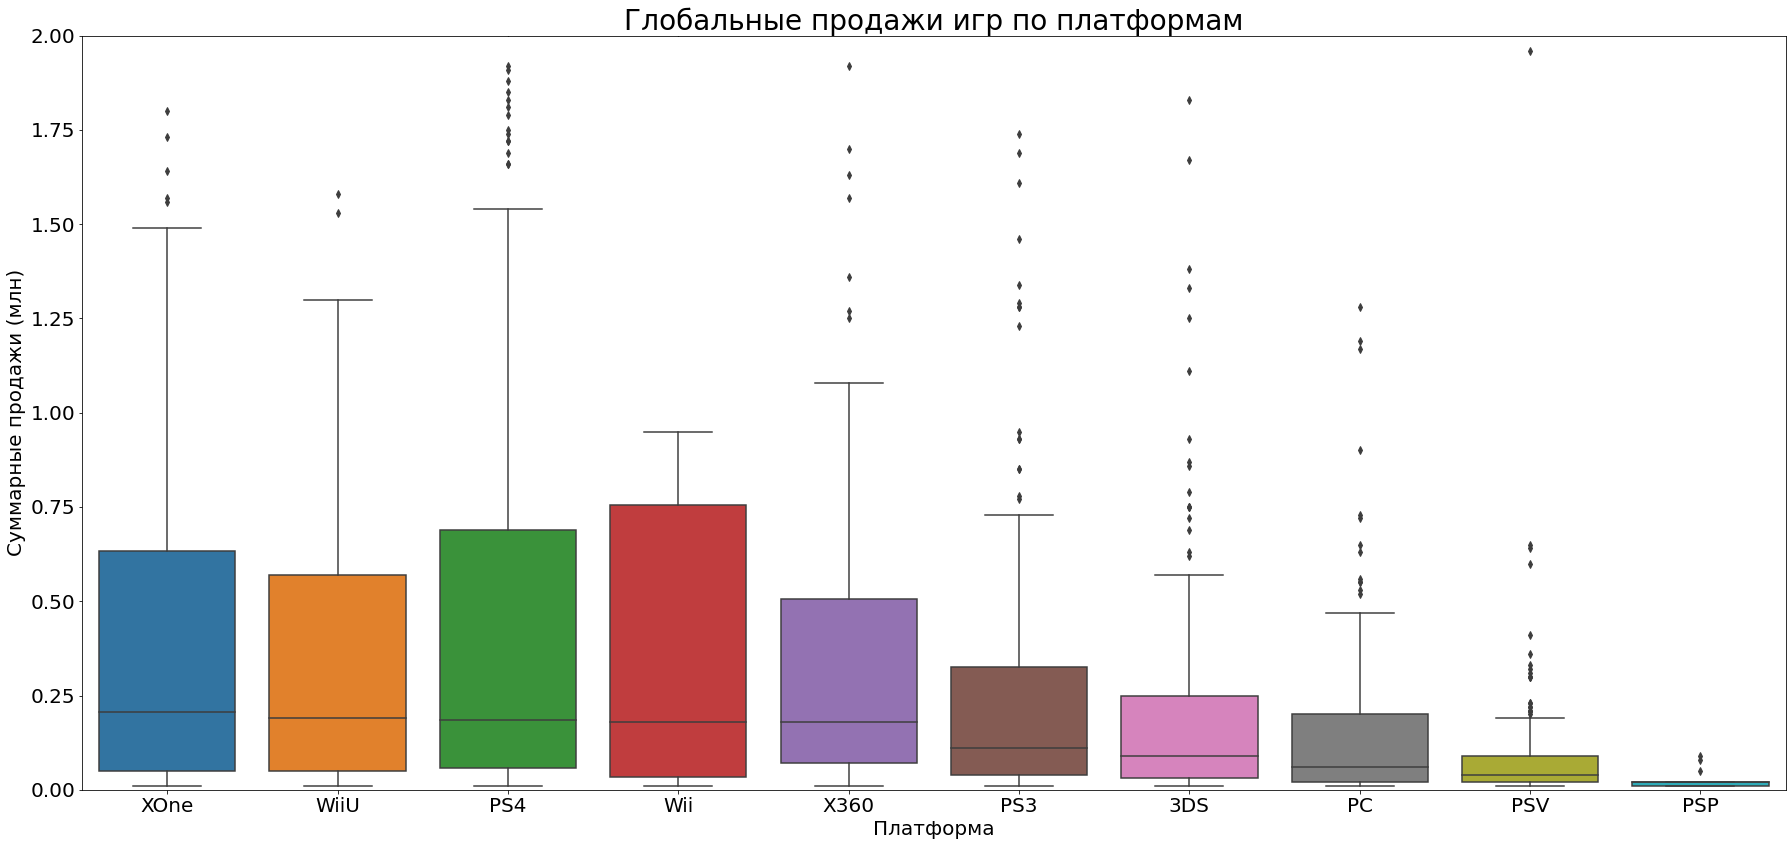

In [ ]:
# Построим график боксплот по суммарным продажам игр в разбивке по платформам
plt.figure(figsize=(25, 12))
sns.boxplot(x="platform", y="total_sales", data=actual_data, order=order)

# Настроим заголовки и метки
plt.title("Глобальные продажи игр по платформам", fontsize=28)
plt.suptitle("")  # Убираем стандартный заголовок
plt.rc("xtick", labelsize=20)
plt.rc("ytick", labelsize=20)
plt.xlabel("Платформа", fontsize=20)
plt.ylabel("Суммарные продажи (млн)", fontsize=20)

# Устанавливаем пределы по оси Y для масштабирования
plt.ylim(0, 2)

plt.tight_layout()  # Настроим отступы
plt.show()

При равной медиане меньший межквартильный размах говорить о стабильно прибыльной платформе.

Исходя из графика перспективными по продажам могут быть XOne, WiiU, PS4, Wii, X360.

### Влияние отзывов пользователей и критиков на продажи X360

Посмотрим, как влияют отзывы пользователей и критиков на продажи внутри одной популярной платформы на примере X360. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

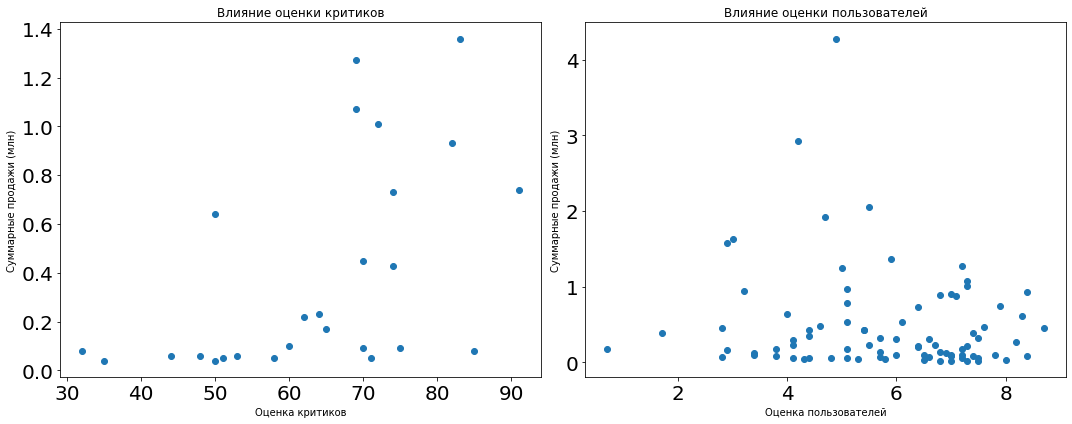

In [ ]:
# Фильтрация данных для платформы X360
x360_data = actual_data[actual_data["platform"] == "X360"]

# Создадим два подграфика
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Построим первый график (влияние оценки критиков)
axs[0].scatter(x360_data["critic_score"], x360_data["total_sales"])
axs[0].set_title("Влияние оценки критиков")
axs[0].set_xlabel("Оценка критиков")
axs[0].set_ylabel("Суммарные продажи (млн)")

# Построим второй график (влияние оценки пользователей)
axs[1].scatter(x360_data["user_score"], x360_data["total_sales"])
axs[1].set_title("Влияние оценки пользователей")
axs[1].set_xlabel("Оценка пользователей")
axs[1].set_ylabel("Суммарные продажи (млн)")

# Настроим отступы
plt.tight_layout()
plt.show()

Диаграммы рассеяния влияния оценки критиков и влияния оценки пользователей похожи друг на друга. По мере увеличения оценки - растут и продажи, но значительная часть игр имеет маленькие объемы продаж, несмотря на высокую оценку.  Взаимосвязь по обеим оценкам имеет более сложный, не линейный характер. Потому используем коэффициент корреляции Тау Кендалла , который измеряет взаимосвязь между двумя столбцами на малых выборках.

  По диаграмме рассеяния мне показалось, что связь не линейная, давайте посмотрим, что получится, если не отсекать выбросы на этапе подсчета продаж по платформам. </font><br>

In [ ]:
# Рассчитаем коэффициент Пирсона для обеих оценок
print(
    "Коэффициент Пирсона для оценок критиков платформы X360:",
    x360_data["critic_score"].corr(x360_data["total_sales"]),
)

print(
    "Коэффициент Пирсона для оценок пользователей платформы X360:",
    x360_data["user_score"].corr(x360_data["total_sales"]),
)

Коэффициент Пирсона для оценок критиков платформы X360: 0.5257228356581523
Коэффициент Пирсона для оценок пользователей платформы X360: -0.138444570945665



Коэффициент корреляции Пирсона для оценок критиков для платформы Х360 равен 0.53 и указывает на положительную взаимосвязь между  оценками критиков и общими продажами. Это означает, что более высокие оценки критиков в некоторой степени связаны с более высокими продажами, но эта связь не является сильной.

Коэффициент корреляции Пирсона для оценок пользователей  для платформы Х360 со значением -0.14 близок к 0 и говорит об отсутствии взаимосвязи между оценками пользователей и общими продажами, то есть, оценки пользователей не оказывают влияния на продажи.

### Влияние отзывов на продажи других платформ

In [ ]:
# Комментарий ревьюера
unique, counts = np.unique(actual_data["critic_score"], return_counts=True)
a = dict(zip(unique, counts))
score = 71
print("Количество оценок", score, "-", a[score])

Количество оценок 71 - 29


Соотнесем выводы о корреляции для других платформ и продаж.

Коэффициент Пирсона для оценок критиков платформы PS4: 0.4
Коэффициент Пирсона для оценок пользователей платформы PS4: -0.04


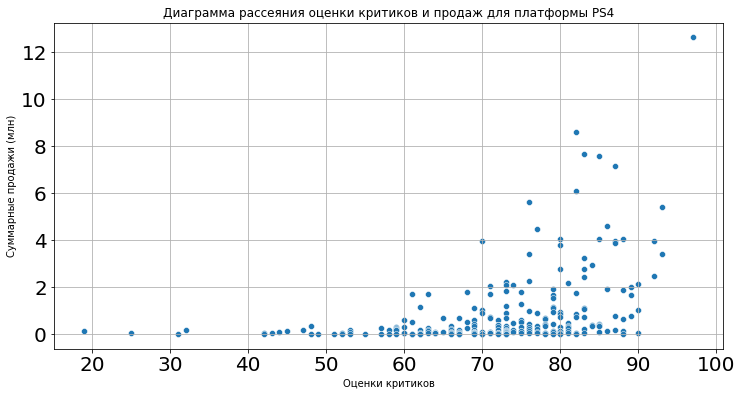

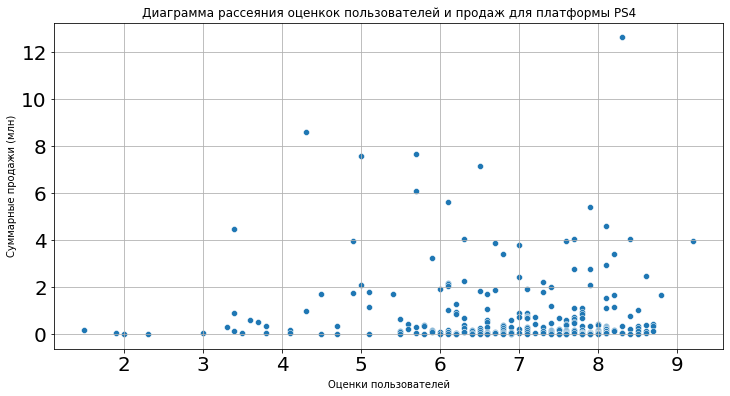

Коэффициент Пирсона для оценок критиков платформы XOne: 0.43
Коэффициент Пирсона для оценок пользователей платформы XOne: -0.07


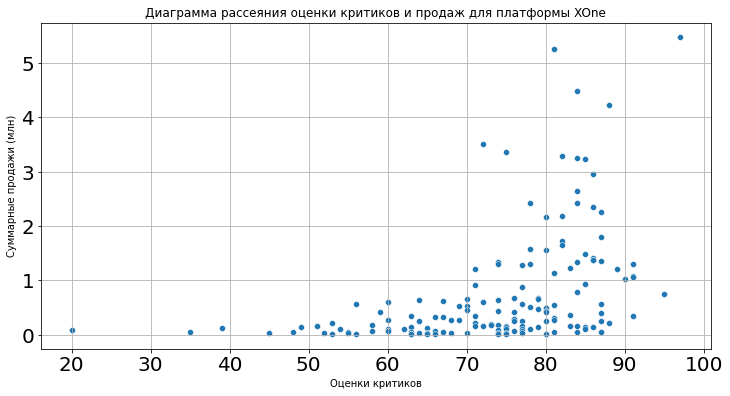

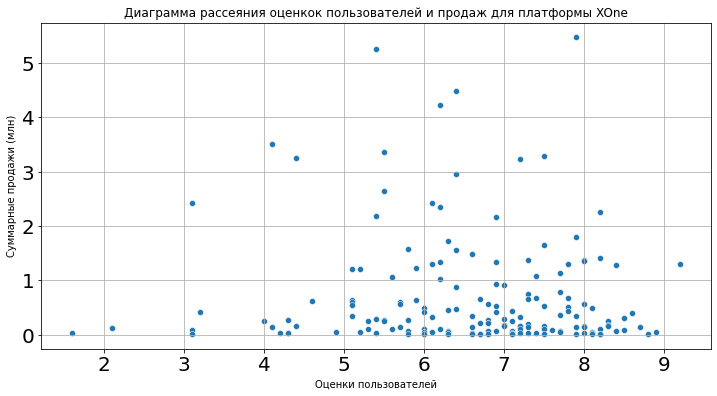

Коэффициент Пирсона для оценок критиков платформы 3DS: 0.31
Коэффициент Пирсона для оценок пользователей платформы 3DS: 0.22


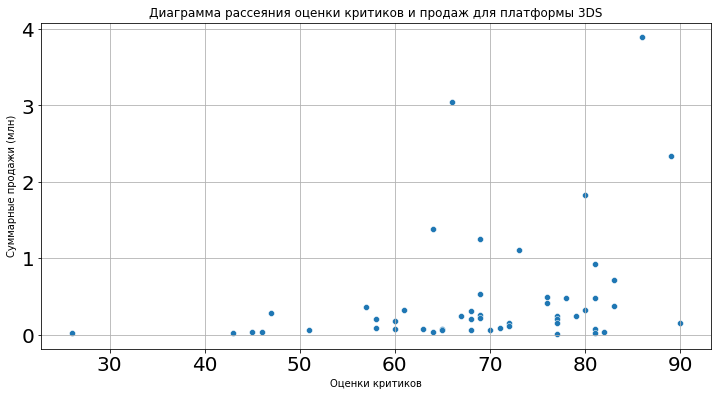

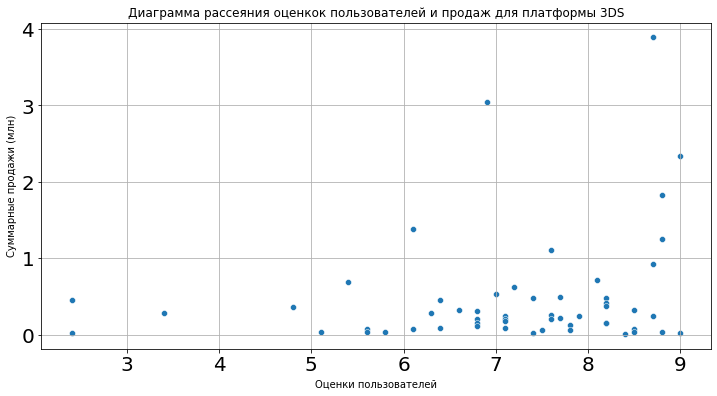

Коэффициент Пирсона для оценок критиков платформы PS3: 0.45
Коэффициент Пирсона для оценок пользователей платформы PS3: -0.17


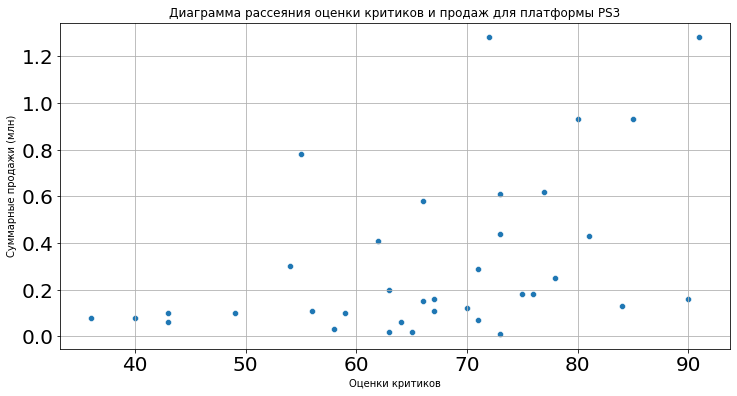

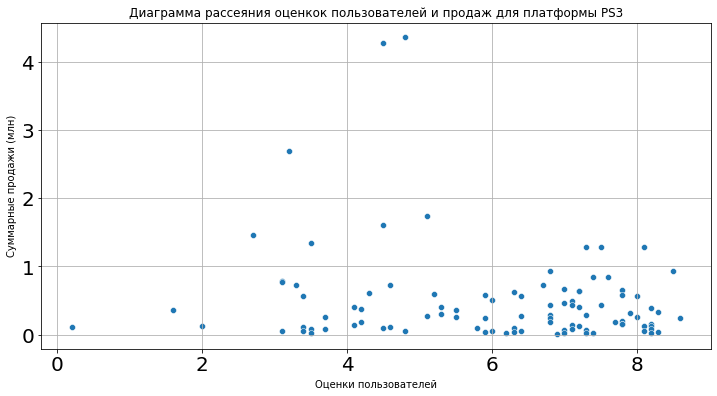

In [ ]:
# Отберем топ-5 платформ по суммарным продажам
top_platforms = actual_data.groupby("platform")["total_sales"].sum().nlargest(4).index

# Цикл по каждой платформе и каждому виду отзывов
for platform in top_platforms:
    platform_data = actual_data[actual_data["platform"] == platform]

    # Рассчитаем коэффициент Пирсона для оценок критиков
    critic_corr = round(
        platform_data["critic_score"].corr(platform_data["total_sales"]),
        2,
    )
    print(
        f"Коэффициент Пирсона для оценок критиков платформы {platform}: {critic_corr}"
    )

    # Рассчитаем коэффициент Пирсона для оценок пользователей
    user_corr = round(
        platform_data["user_score"].corr(platform_data["total_sales"]),
        2,
    )
    print(
        f"Коэффициент Пирсона для оценок пользователей платформы {platform}: {user_corr}"
    )

    # Построение диаграммы рассеяния для оценок критиков
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=platform_data["critic_score"], y=platform_data["total_sales"])
    plt.title(f"Диаграмма рассеяния оценки критиков и продаж для платформы {platform}")
    plt.xlabel("Оценки критиков")
    plt.ylabel("Суммарные продажи (млн)")
    plt.grid(True)
    plt.show()

    # Построение диаграммы рассеяния для оценок пользователей
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=platform_data["user_score"], y=platform_data["total_sales"])
    plt.title(
        f"Диаграмма рассеяния оценкок пользователей и продаж для платформы {platform}"
    )
    plt.xlabel("Оценки пользователей")
    plt.ylabel("Суммарные продажи (млн)")
    plt.grid(True)
    plt.show()

Итак, мы получили показатели:<br>
    
Коэффициент Пирсона для оценок критиков платформы X360: 0.53<br>
Коэффициент Пирсона для оценок пользователей платформы X360: -0.14<br>

Коэффициент Пирсона для оценок критиков платформы PS4: 0.4<br>
Коэффициент Пирсона для оценок пользователей платформы PS4: -0.04<br>
    
Коэффициент Пирсона для оценок критиков платформы XOne: 0.43<br>
Коэффициент Пирсона для оценок пользователей платформы XOne: -0.07<br>
    
Коэффициент Пирсона для оценок критиков платформы 3DS: 0.31<br>
Коэффициент Пирсона для оценок пользователей платформы 3DS: 0.22<br>
    
Коэффициент Пирсона для оценок критиков платформы PS3: 0.45<br>
Коэффициент Пирсона для оценок пользователей платформы PS3: -0.17<br>

    
Коэффициент Пирсона для оценок критиков чаще всего около 0,4-0,5, что указывает на умеренную положительную корреляцию с продажами. Из топ-5 платформ только для 3DS он составляет 0.31, что указывает на более слабую положительную корреляцию, здесь связь между оценками критиков и продажами менее выражена по сравнению с другими платформами.<br>
  
Коэффициент Пирсона для оценок пользователей для топ-5 платформ очень близок к нулю, следовательно, не показывают значимой связи с продажами, что может указывать на то, что мнения пользователей менее важны для коммерческого успеха игр по сравнению с оценками критиков. Однако, для платформы 3DS он составляет 0.22, что указывает на слабую взаимосвязь с оценками пользователей<br>
    
Оценки критиков имеют более выраженное влияние на продажи игр на всех платформах, чем оценки пользователей.
</font><br>

### Популярность жанров

Посмотрим на общее распределение игр по жанрам.

In [ ]:
print(actual_data["genre"].value_counts())

Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: genre, dtype: int64


Данные показывают, что жанр Action (Экшн) является наиболее распространенным. Топ-5 жанров включает в себя также Role-Playing (Ролевые игры), Adventure (Приключения), Sports (Спорт) и Misc (Музыка). Эти жанры преобладают на рынке видеоигр, что, вероятно, свидетельствует об их популярности среди игроков.

Посчитаем, какие жанры имеют наибольшие продажи.

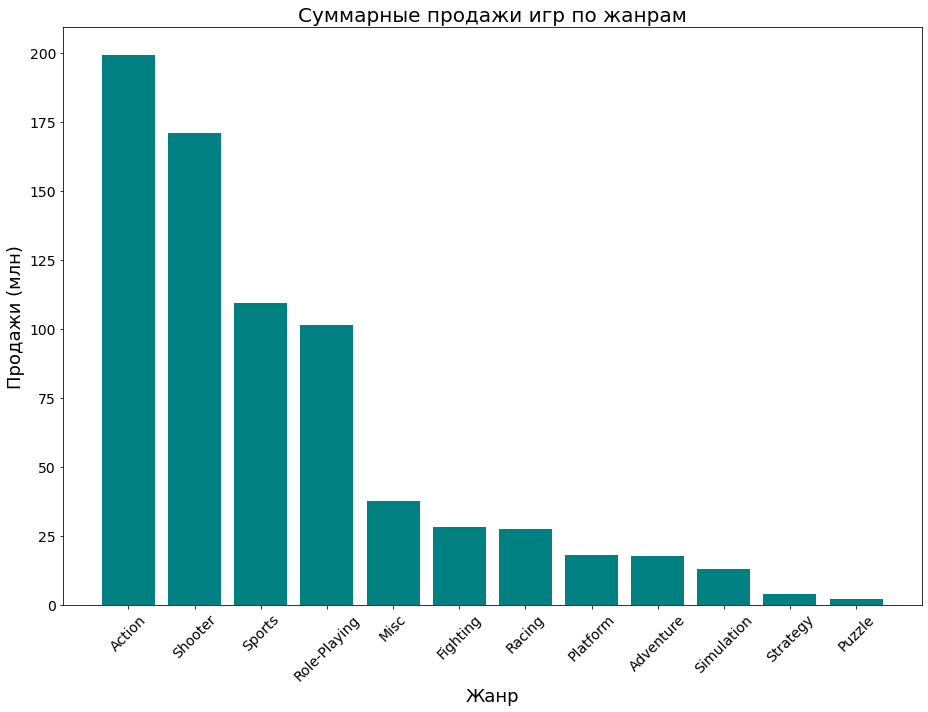

In [ ]:
# Подсчитаем суммарные продажи по жанрам
sales_genre = actual_data.groupby("genre")["total_sales"].sum().reset_index()

# Сортируем по суммарным продажам
sales_genre = sales_genre.sort_values(by="total_sales", ascending=False)

# Построим график
plt.figure(figsize=(13, 10))
plt.bar(sales_genre["genre"], sales_genre["total_sales"], color="teal")
plt.title("Суммарные продажи игр по жанрам", fontsize=20)
plt.xlabel("Жанр", fontsize=18)
plt.ylabel("Продажи (млн)", fontsize=18)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

График показывает, что экшен, ролевые игры, спортивные симуляторы и шутеры являются лидерами по суммарным продажам среди жанров, в то время как головоломки, стратегии, симуляторы, платформеры и гонки приносят наименьшие доходы.

Определим самые прибыльные жанры.

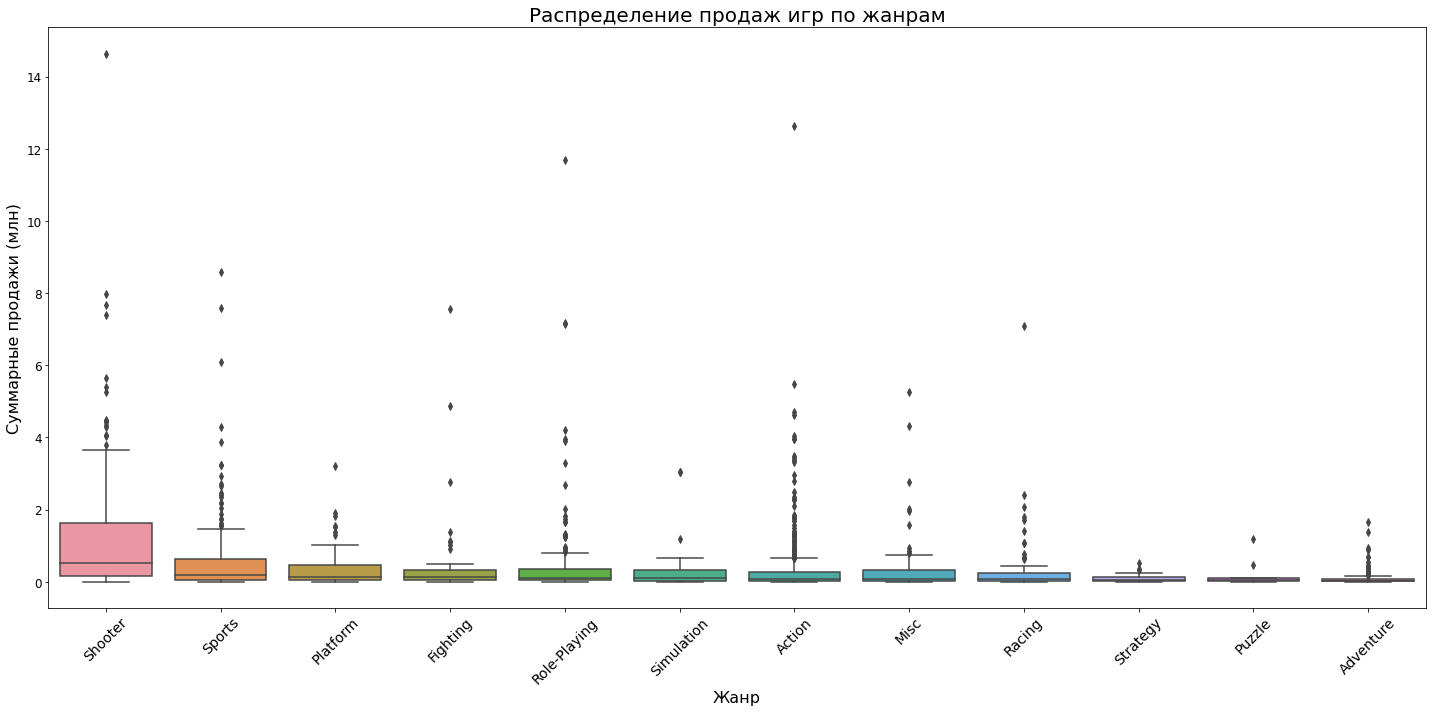

In [ ]:
# Вычислим медианные продажи для каждого жанра
sales_genre = actual_data.groupby("genre")["total_sales"].median().reset_index()

# Отсортируем жанры по медианным продажам в порядке возрастания
order = sales_genre.sort_values(by="total_sales", ascending=False)["genre"]

# Построим боксплоты, отсортированные по медиане
plt.figure(figsize=(20, 10))
sns.boxplot(x="genre", y="total_sales", data=actual_data, order=order)
plt.title("Распределение продаж игр по жанрам", fontsize=20)
plt.xlabel("Жанр", fontsize=16)
plt.ylabel("Суммарные продажи (млн)", fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Столбчатая диаграмма отличается от графика боксплотов - в боксплотах, отсортированных по медиане, лучше продажи показывают жанры Shooter, Sports, Fighting, Role-Playing и Platform.

Боксплот жанра Action, лидирующего по общим продажам, показал, что жанр имеет как несколько очень успешных игр, так и ряд малопродающихся игр. Подобное распределение со множеством выбросов характерно также для жанра Role-Playing.

Предварительные выводы:
    
В период с 1980 по 1993 год количество выпускаемых игр было примерно одинаковым. С 1994 года наблюдался бурный рост количества новых игр. После 2009 года количество игр стало значительно уменьшаться.
Данные за все периоды не являются важными, тк во многом зависят от актуальности платформы.


Лидерами по продажам являются платформы PS2, X360, PS3, Wii, DS, PS.

Срок жизни платформы около 10 лет. На него оказывают влияние масса факторов - технологические изменения и поддержка разработчиков, спрос и конкуренция. Фаза роста спроса выглядит более резкой, а фаза спада - более пологой.

За актуальный для исследования период следует брать последние 3 года, тк в силу интенсивности развития игровой отрасли актуальность платформ может быстро теряться.

График наглядно демонстрирует спад продаж всех платформ видеоигр, однако, нужно учитывать, что данные за 2016 год могут быть неполными, и есть ли на самом деле спад, стоит проверить, когда будут доступны полные данные за 2016 год. Между тем, в 2015 году демонстрируют рост продаж две платформы - PS4 и XOne. Их однозначно следует рассматривать как наиболее перспективные для продвижения.

Перспективными по продажам могут быть X360, Wii, Xone, WiiU. Платформа PS4 все же отстает от лидеров из-за большого количества выбросов.


Взаимосвязи оценки критиков и оценки пользователей на продажи имеет более сложный, не линейный характер.  

Используем коэффициент Пирсона для оценки корреляции между оценками критиков и пользователей и продажами видеоигр.<br>

Коэффициент Пирсона для оценок критиков чаще всего около 0,4-0,5, что указывает на умеренную положительную корреляцию с продажами. Из топ-5 платформ только для 3DS он составляет 0.31, что указывает на более слабую положительную корреляцию, здесь связь между оценками критиков и продажами менее выражена по сравнению с другими платформами.<br>
Коэффициент Пирсона для оценок пользователей для топ-5 платформ очень близок к нулю, следовательно, не показывают значимой связи с продажами, что может указывать на то, что мнения пользователей менее важны для коммерческого успеха игр по сравнению с оценками критиков. Однако, для платформы 3DS он составляет 0.22, что указывает на слабую взаимосвязь с оценками пользователей.<br>
Оценки критиков имеют более выраженное влияние на продажи игр на всех платформах, чем оценки пользователей.
</font><br>

Данные показывают, что жанр Action (Экшн) является наиболее распространенным. Топ-5 жанров включает в себя также Role-Playing (Ролевые игры), Adventure (Приключения), Sports (Спорт) и Misc (Музыка). Эти жанры преобладают на рынке видеоигр, что, вероятно, свидетельствует об их популярности среди игроков.

Исследование показывает, что экшен, ролевые игры, спортивные симуляторы и шутеры являются лидерами по суммарным продажам среди жанров, в то время как головоломки, стратегии, симуляторы, платформеры и гонки приносят наименьшие доходы.

В боксплотах, отсортированных по медиане, стабильные продажи показывают жанры Shooter, Sports, Fighting, Role-Playing и Platform.

Боксплот жанра Action, лидирующего по общим продажам, показал, что жанр имеет как несколько очень успешных игр, так и ряд малопродающихся игр. Подобное распределение со множеством выбросов характерно также для жанра Role-Playing.

## Портрет пользователя каждого региона

Составим портрет пользователя каждого региона.

### Предпочтения платформ в регионах

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы.

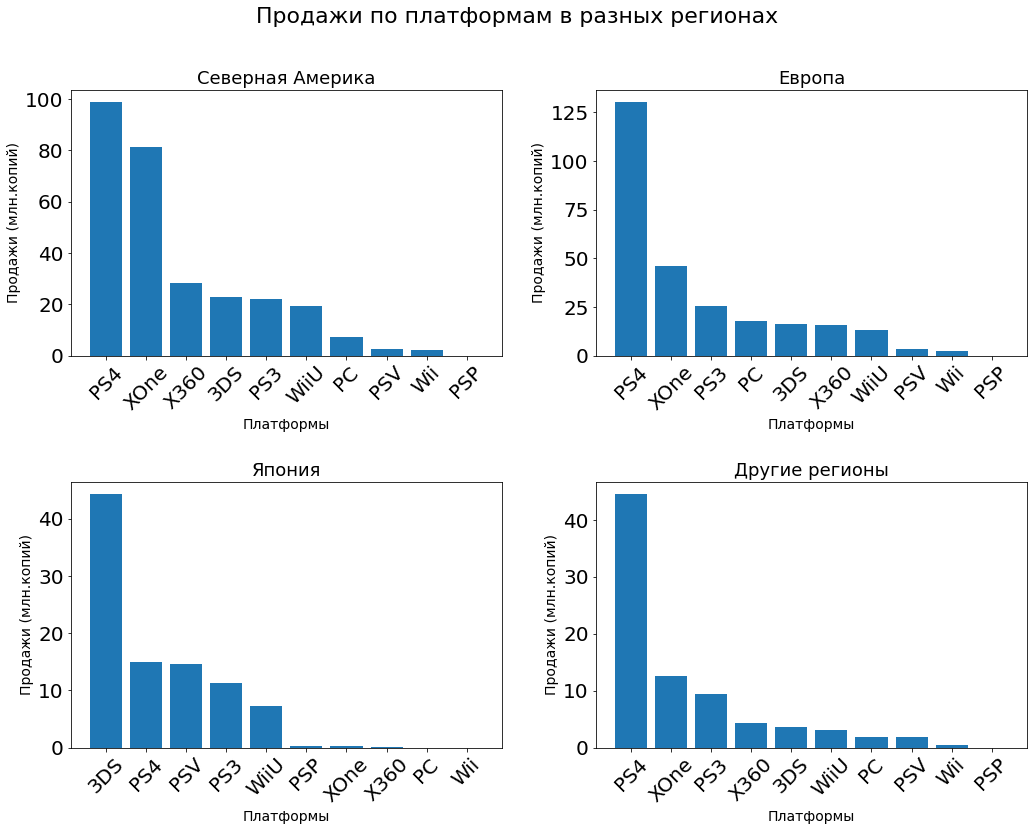

In [ ]:
# Создадим функцию для подсчета продаж по платформам в заданном регионе
def get_top_platforms_by_region(region_sales):
    top_platforms = actual_data.groupby("platform")[region_sales].sum().reset_index()
    top_platforms = top_platforms.sort_values(by=region_sales, ascending=False)
    return top_platforms


# Определим продажи платформ для каждого региона
top_na_platforms = get_top_platforms_by_region("na_sales")
top_eu_platforms = get_top_platforms_by_region("eu_sales")
top_jp_platforms = get_top_platforms_by_region("jp_sales")
top_oth_platforms = get_top_platforms_by_region("other_sales")

# Построим столбчатые диаграммы по каждому региону
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Северная Америка
ax = axes[0, 0]
ax.bar(top_na_platforms["platform"], top_na_platforms["na_sales"])
ax.set_xlabel("Платформы", fontsize=14)  # Добавленная строчка кода - исправление 2
ax.set_ylabel("Продажи (млн.копий)", fontsize=14)
ax.set_title("Северная Америка", fontsize=18)
ax.tick_params(axis="x", rotation=45)

# Европа
ax = axes[0, 1]
ax.bar(top_eu_platforms["platform"], top_eu_platforms["eu_sales"])
ax.set_xlabel("Платформы", fontsize=14)  # Добавленная строчка кода - исправление 2
ax.set_ylabel("Продажи (млн.копий)", fontsize=14)
ax.set_title("Европа", fontsize=18)
ax.tick_params(axis="x", rotation=45)

# Япония
ax = axes[1, 0]
ax.bar(top_jp_platforms["platform"], top_jp_platforms["jp_sales"])
ax.set_xlabel("Платформы", fontsize=14)  # Добавленная строчка кода - исправление 2
ax.set_ylabel("Продажи (млн.копий)", fontsize=14)
ax.set_title("Япония", fontsize=18)
ax.tick_params(axis="x", rotation=45)

# Другие регионы
ax = axes[1, 1]
ax.bar(top_oth_platforms["platform"], top_oth_platforms["other_sales"])
ax.set_xlabel("Платформы", fontsize=14)  # Добавленная строчка кода - исправление 2
ax.set_ylabel("Продажи (млн.копий)", fontsize=14)
ax.set_title("Другие регионы", fontsize=18)
ax.tick_params(axis="x", rotation=45)

plt.suptitle("Продажи по платформам в разных регионах", fontsize=22)
plt.tight_layout(
    pad=3.0
)  # Исправление 2 - увеличила значение pad для большего расстояния
plt.show()

- В Северной Америке PS4 и XOne являются лидерами по продажам. Остальные платформы из топ-5 X360, 3DS и PS3 имеют продажи в 2-3 раза меньше, чем лидеры.
- В Европе также PS4 лидирует по продажам, следующая по популярности платформа XOne имеет продажи в 3 раза меньше. PS3 занимает третье место, а Х360 и 3DS замыкают топ-5.
- В Японии доминируют портативные консоли - 3DS, а также PSV (з место). PS4  и PS3 также входят в топ-4, есть и почитатели Wii U (пятое место).
- В других регионах PS4 лидирует по продажам, за ней следуют XONE, PS3 и X360. 3DS замыкает топ-5.

Распределение топ-5 платформ по продажам сильно различается в разных регионах. В Северной Америке, Европе и других регионах доминируют консоли нового поколения - PS4 b XOne. В Японии популярны портативные консоли 3DS, PS4 имеет продажи в 3 раза меньше.

In [ ]:
# Посчитаем доли рынка платформ, входящих в топ-5 для Северной Америки
total_na_sales = actual_data["na_sales"].sum()
na_platform_shares = (
    (actual_data.groupby("platform")["na_sales"].sum() / total_na_sales) * 100
).sort_values(ascending=False)

# Посчитаем доли рынка платформ, входящих в топ-5 для Европы
total_eu_sales = actual_data["eu_sales"].sum()
eu_platform_shares = (
    (actual_data.groupby("platform")["eu_sales"].sum() / total_eu_sales) * 100
).sort_values(ascending=False)

# Посчитаем доли рынка платформ, входящих в топ-5 для Японии
total_jp_sales = actual_data["jp_sales"].sum()
jp_platform_shares = (
    (actual_data.groupby("platform")["jp_sales"].sum() / total_jp_sales) * 100
).sort_values(ascending=False)

# Посчитаем доли рынка платформ, входящих в топ-5 для других регионов
total_other_sales = actual_data["other_sales"].sum()
other_platform_shares = (
    (actual_data.groupby("platform")["other_sales"].sum() / total_other_sales) * 100
).sort_values(ascending=False)

# Вывод долей продаж
print("Различия в долях продаж платформ по регионам (%):")

print("\nСеверная Америка:")
print(na_platform_shares.head())

print("\nЕвропа:")
print(eu_platform_shares.head())

print("\nЯпония:")
print(jp_platform_shares.head())

print("\nДругие регионы:")
print(other_platform_shares.head())

Различия в долях продаж платформ по регионам (%):

Северная Америка:
platform
PS4    34.71
XOne   28.61
X360    9.96
3DS     7.97
PS3     7.76
Name: na_sales, dtype: float64

Европа:
platform
PS4    48.04
XOne   17.09
PS3     9.44
PC      6.64
3DS     5.96
Name: eu_sales, dtype: float64

Япония:
platform
3DS    47.52
PS4    16.13
PSV    15.62
PS3    12.05
WiiU    7.85
Name: jp_sales, dtype: float64

Другие регионы:
platform
PS4    54.50
XOne   15.34
PS3    11.48
X360    5.33
3DS     4.51
Name: other_sales, dtype: float64


На основе данных о долях продаж топ-5 платформ по регионам можно сделать следующие краткие наблюдения:
- в Северной Америке PS4 (34.71%) и XOne (28.61%) лидируют, показывая сильные позиции. В сумме эти две позиции занимают чуть более половины Северо-Американского рынка. X360 (9.96%), 3DS (7.97%) и PS3 (7.76%) также входят в пятерку популярных платформ.

- в Европе PS4 (48.04%) занимает почти половину доли рынка, за ней следуют XOne (17.09%), PS3 (9.44%). Платформы PC (6.64%) и 3DS (5.96%) также в топ-5, но с меньшими долями.

- в Японии 3DS (47.52%) занимает половину рынка.  PS4 (16.13%), PSV  (15.62%) и PS3 (12.05%) имеют невысокие доли, а WiiU (7.85%) замыкает пятерку популярных.

- в других регионах PS4 (54.50%) опять на первом месте, XOne (15.34%) и PS3 (11.48%) показывают хорошие результаты, но X360 (5.33%) и 3DS (4.51%) имеют низкие доли.


Таким образом, PS4 является наиболее популярной платформой во всех регионах, что подчеркивает её сильные позиции на рынке.
XOne также показывает хорошие результаты, особенно в Северной Америке и других регионах.
Платформы 3DS и PS3 имеют заметные, но менее значительные доли, в то время как X360 и WiiU показывают относительно низкие результаты.
В Японии наблюдается высокая популярность портативных игровых консолей, таких как  3DS и PSV. Это может быть связано с культурными особенностями, где мобильные игры и консоли удобны для использования в общественном транспорте и в повседневной жизни.

Различия в предпочтениях пользователей между регионами указывают на разнообразие игровых предпочтений и маркетинговых стратегий, которые могут быть использованы для повышения продаж.

### Популярность жанров в регионах

Помня о том, что разделе 3.5 в на боксплотах были видны множество выбросов, и жанр Action оказался не столь популярным, как показалось на первый взгляд, популярность жанров в регионах решено измерять с помощью медиан.

In [ ]:
# Функция для вычисления популярности жанров по регионам
def calculate_genre_popularity(region_sales):
    genre_popularity = actual_data.groupby("genre")[region_sales].median().reset_index()
    genre_popularity = genre_popularity.sort_values(by=region_sales, ascending=False)
    return genre_popularity


# Вывод результатов
print("Популярность жанров в Северной Америке (млн.):")
print(calculate_genre_popularity("na_sales").head())

print("\nПопулярность жанров в Европе:")
print(calculate_genre_popularity("eu_sales").head())

print("\nПопулярность жанров в Японии:")
print(calculate_genre_popularity("jp_sales").head())

print("\nПопулярность жанров в других регионах:")
print(calculate_genre_popularity("other_sales").head())

Популярность жанров в Северной Америке (млн.):
       genre  na_sales
8    Shooter      0.22
4   Platform      0.08
10    Sports      0.07
2   Fighting      0.04
6     Racing      0.03

Популярность жанров в Европе:
         genre  eu_sales
8      Shooter      0.22
4     Platform      0.06
6       Racing      0.05
10      Sports      0.05
9   Simulation      0.03

Популярность жанров в Японии:
          genre  jp_sales
7  Role-Playing      0.05
2      Fighting      0.03
5        Puzzle      0.03
0        Action      0.01
1     Adventure      0.01

Популярность жанров в других регионах:
       genre  other_sales
8    Shooter         0.06
4   Platform         0.02
10    Sports         0.02
0     Action         0.01
2   Fighting         0.01


Получаем следующие выводы:

- Северная Америка: Shooter  занимает лидирующую позицию. Platform также имеет значительное количество продаж. Sports, Fighting и Racing имеют меньшую долю, но все еще представляют интерес для определенной аудитории.

- Европа: Shooter, как и в Северной Америке занимает первое место, что подтверждает их глобальную привлекательность. Platform также популярен в Европе. Racing занимает более заметное место в Европе по сравнению с Северной Америкой, что может быть связано с культурными предпочтениями. Sports востребованны, особенно в странах с сильными спортивными традициями. Simulation также имеет свою аудиторию.

- Япония: Role-Playing занимают первое место, что отражает культурные предпочтения японских игроков. Fightingтакже популярны, что связано с сильной культурой киберспорта и турниров. Puzzle  имеет свою аудиторию. Action и Adventure также присутствуют, но с меньшими показателями, что может указывать на более нишевый интерес.

- Другие регионы: Shooter также доминирует, как и в других регионах, что подтверждает его универсальность. Platform  и Sports меньшее число продаж, но все еще сохраняют свои привлекательность. Action и Fighting также присутствуют, но с низкими показателями, что может указывать на меньшую общую популярность по сравнению с другими регионами.


Shooter является наиболее востребованным жанром, популярным в Северной Америке, Европе и других регионах.
Role-Playing выделяется в Японии, что отражает уникальные культурные предпочтения.
Platform, Sports и Racing жанры сохраняют свою популярность в большинстве регионов.
Различия в предпочтениях жанров могут быть связаны с культурными, историческими и социальными факторами, влияющими на игровую индустрию в каждом регионе.

### Влияние рейтинга ESRB

Определим влияние рейтинга ESRB на продажи в отдельном регионе.

In [ ]:
# Посчитаем продажи игр по рейтингам для Северной Америки
na_platform_rat = (
    actual_data.groupby("rating")["na_sales"].sum().sort_values(ascending=False)
)

# Посчитаем продажи игр по рейтингам для Европы
eu_platform_rat = (
    actual_data.groupby("rating")["eu_sales"].sum().sort_values(ascending=False)
)

# Посчитаем продажи игр по рейтингам для Японии
jp_platform_rat = (
    actual_data.groupby("rating")["jp_sales"].sum().sort_values(ascending=False)
)

# Посчитаем продажи игр по рейтингам для других регионов
other_platform_rat = (
    actual_data.groupby("rating")["other_sales"].sum().sort_values(ascending=False)
)

# Выведем полученные данные
print("Различия в продажах игр по рейтингу")

print("\nСеверная Америка:")
print(na_platform_rat)

print("\nЕвропа:")
print(eu_platform_rat)

print("\nЯпония:")
print(jp_platform_rat)

print("\nДругие регионы:")
print(other_platform_rat)

Различия в продажах игр по рейтингу

Северная Америка:
rating
M      96.42
E      50.74
T      38.95
E10+   33.23
Name: na_sales, dtype: float64

Европа:
rating
M      93.44
E      58.06
T      34.07
E10+   26.16
Name: eu_sales, dtype: float64

Япония:
rating
T      14.78
E       8.94
M       8.01
E10+    4.46
Name: jp_sales, dtype: float64

Другие регионы:
rating
M      28.67
E      15.39
T      11.33
E10+    7.83
Name: other_sales, dtype: float64


Напомним краткие значения рейтинга, которые обозначают возрастные ограничения:

E (Everyone): Подходит для всех возрастов.

T (Teen): Подходит для подростков от 13 лет и старше.

M (Mature): Подходит для взрослых от 17 лет и старше.

E10+ (Everyone 10 and older): Подходит для всех от 10 лет и старше.

EC (Early Childhood): Подходит для детей младшего возраста.

K-A (Kids to Adults): Ранее использовался для обозначения игр, подходящих для детей и взрослых. Этот рейтинг был заменен на E10+.

AO (Adults Only): Подходит только для взрослых.

RP (Rating Pending): Рейтинг еще не присвоен. Игра находится в процессе оценки.

На основе данных о продажах игр по рейтингам ESRB в разных регионах можно сделать следующие наблюдения:
- в Северной Америке рейтинг M (Mature, 17+) занимает первое место, что указывает на высокий спрос на игры для взрослой аудитории. Также популярны игры с рейтинг E (Everyone), T (Teen, 13+) и E (Everyone).

- в Европе рейтинг M также лидирует, что подтверждает интерес к играм для взрослых. Рейтинг E10+ занимает второе место, показывая схожие предпочтения с Северной Америкой. Рейтинги E и T имеют почти равные продажи.

- в Японии рейтинг T (Teen, 13+) доминирует, рейтинги E, M и E10+ имеют значительно меньшие доли.

- в других регионах рейтинг M занимает первое место, но с меньшими показателями по сравнению с Северной Америкой и Европой. Рейтинги E10+, T и E имеют более низкие доли.

Таким образом, игры с рейтингом M пользуются высоким спросом в Северной Америке и Европе, что отражает интерес аудитории к более зрелому контенту или же можно предположить, что в видеоигры играют чаще взрослые.
Япония выделяется своим предпочтением к играм для подростков, в то время как другие регионы демонстрируют более низкий интерес во всех возрастных категориях.

Считаю, что на данном этапе не очень корректно сравнивать продаваемость видеоигр на основе рейтингов, тк у представленных регионов существуют свои рейтинговые системы, которые по-разному  подходят к рекомендациям видеоигр по возрасту. Стоит глубже изучить тему, чтобы найти реальные взаимосвязи. Но, поскольку поставлено задание, можно пренебречь нюансами, и описать портреты пользователей на основе выявленных предпочтений.


При предобработке данных не была поставлена заглушка на пропуски в рейтинге ESRB. И игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах.</font><br>
Если посмотреть в инете, что из себя представляет рейтинг ESRB, то окажется, что он предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется. Наша задача смотреть шире на исходный датасет, так как за цифрами находятся реальные бизнес-процессы. И это необходимо учитывать при предобработке данных.  Для этого лучше поставить заглушку и вывести ее при анализе.</font>

In [ ]:
# Проверим наличие и распространённость пропусков в столбце rating и выведем распределение всех значений этого столбца.
temp = actual_data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum() / len(temp))
temp.rating.value_counts(dropna=False)

749 0.443457667258733


NaN     749
T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64

Поставим заглушку на пропуски и выведем ее на диаграмму, чтобы получить  важный результат о предпочтениях пользователей Японии играм без Северо-Американского возрастного рейтинга.

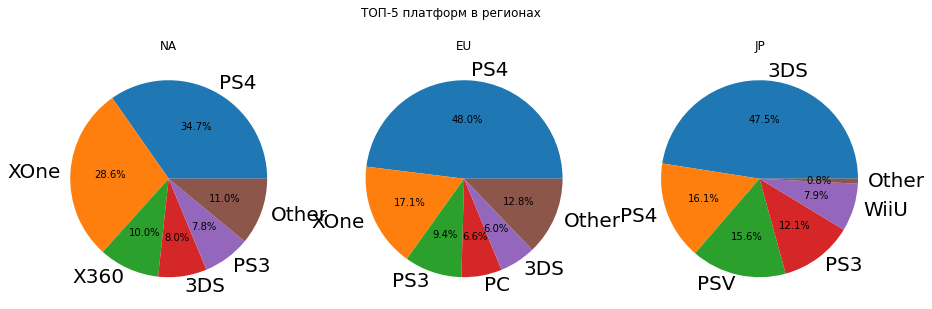

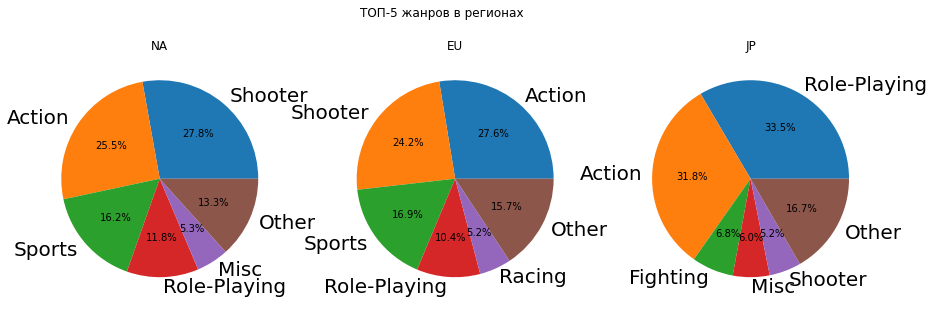

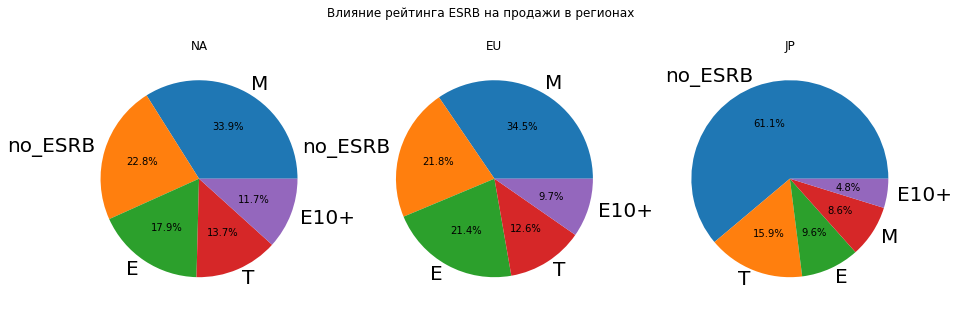

In [ ]:
tmp = (
    actual_data.copy()
)  # делаем копию текущего датасета, что бы не работать с исходным
tmp.rating = tmp.rating.replace(np.nan, "no_ESRB")
parametr = "platform"  # задаем имя колонки для построения диаграмм


def pie_chart(
    df, parametr="platform"
):  # в функцию передаем датасет и имя колонки платформ/жанров/рейтинга
    region = df.columns[4:7]  # создаем список регионов из названий колонок
    # начертим круговую диаграмму для каждого региона
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    if parametr == "platform":  # будем рисовать диаграммы по платформам
        fig.suptitle("ТОП-5 платформ в регионах")
    elif parametr == "genre":  # будем рисовать диаграммы по жанрам
        fig.suptitle("ТОП-5 жанров в регионах")
    elif parametr == "rating":  # будем рисовать диаграммы по возрастному рейтингу
        fig.suptitle("Влияние рейтинга ESRB на продажи в регионах")
    for r in range(len(region)):
        if parametr != "rating":  # здесь будет формировать топ-5 и группу "другие"
            # выберем 5 самых продающих платформ/жанров
            df_r = (
                df.groupby(parametr)[region[r]]
                .sum()
                .reset_index()
                .sort_values(region[r], ascending=False, ignore_index=True)[:5]
            )
            # занесем все остальные продажи в другие палатформы/жанры
            df_r = df_r.append(
                {
                    parametr: "Other",
                    region[r]: df[region[r]].sum() - df_r[region[r]].sum(),
                },
                ignore_index=True,
            )
        else:  # в возрастном рейтинге строим диаграммы по всем значениям
            df_r = (
                df.groupby(parametr)[region[r]]
                .sum()
                .reset_index()
                .sort_values(region[r], ascending=False, ignore_index=True)
            )

        axs[r].pie(df_r[region[r]], labels=df_r[parametr], autopct="%1.1f%%")
        # зададим название региона.
        axs[r].set_title(df_r.columns[1].split("_")[0].upper())
    plt.show()


pie_chart(tmp, parametr)  # выводим диаграмму
pie_chart(tmp, "genre")
pie_chart(tmp, "rating")

### Портреты пользователей разных регионов

На основе предоставленных данных о продажах видеоигр по регионам, жанрам и рейтингам ESRB можно составить портрет пользователей видеоигр в разных частях мира.

**Северная Америка**

Это геймер, предпочитающий консоли нового поколения, такие как PS4 и XOne, что говорит о желании играть в высококачественные графические игры.<br>
Играет в шутеры и платформеры, интересуется спортивными играми и файтингами.<br>
Часто выбирает игры с рейтингом M, на что указывает высокий спрос на контент для взрослой аудитории.

**Европа**

Европейский потребитель видеоигр также предпочитает консоли нового поколения, с особым интересом к PS4, но также остается верен старым платформам, ПК и портативной консоли 3DS.<br>
Любит шутеры, платформеры и спортивные игры, с акцентом на гонки, что может быть связано с культурными традициями.<br>
Играет в игры с рейтингом M и E10+, что отражает интерес к контенту для взрослых и молодежи.

**Япония**

Пользователь Японии значительно отличается от остальных игроков.<br>
Среди японских пользователей популярны портативные консоли, такие как 3DS, что отражает стиль жизни, где мобильность играет важную роль.<br>
Отдает предпочтение ролевым играм, что указывает на культурные традиции и интерес к сюжетным играм. Интересуется жанрами файтинг и головоломками.<br>
Рейтинг T доминирует, что говорит о предпочтении игр для подростков. В Японии потребители могут быть как молодыми, так и взрослыми, но акцент на ролевые игры может говорить о более зрелой аудитории, ищущей глубокий сюжет и развитие персонажей.

**Другие регионы**

В других регионах потребители видеоигр предпочитают разнообразные жанры, но с меньшей активностью по сравнению с Северной Америкой и Европой.<br>
Шутеры занимают лидирующие позиции, но также интересуются платформерами и спортивными играми.<br>
Игры с рейтингом M также популярны, но с более низкими показателями.
Потребитель может быть разнообразными по возрасту, но общая тенденция указывает на более низкий интерес к играм по сравнению с другими регионами.<br>
Предпочтения по платформам могут варьироваться, но, как правило, это более старые консоли и ПК.

**Сравнение портретов**

Таким образом, в Северной Америке, Европе и других странах пользователи отдают большее предпочтение современным консолям, таким как PS4 и XOne, что говорит о желании играть в высококачественные графические игры с продвинутым контентом. <br>
Кроме того, в Европе пользователи остаются верны старым платформам и ПК. В Японии же доминируют портативные консоли, такие как 3DS, что отражает стиль жизни, ориентированный на мобильность.<br>

Шутеры занимают лидирующие позиции в западных регионах, что подтверждает их универсальность и привлекательность для широкой аудитории.<br>
Спортивные игры также популярны как в Северной Америке, так и в Европе, что может быть связано с сильными спортивными традициями в этих регионах.<br>
В Японии пользователи предпочитают ролевые игры и головоломки, что указывает на культурные традиции и интерес к сюжетным играм.<br>


В западных регионах наблюдается высокий спрос на игры с рейтингом M, что указывает на интерес к контенту для взрослой аудитории.<br>
В Японии рейтинг T (Teen) доминирует, что говорит о предпочтении игр для подростков. Это может указывать культурные различия стран.<br>


В других регионах пользователи демонстрируют меньшую активность по сравнению с Северной Америкой и Европой. Хотя шутеры остаются популярными, интерес к играм в целом ниже, и предпочтения могут варьироваться, включая более старые консоли и ПК.<br>

Общие черты между регионами показывают, что современные консоли и шутеры остаются популярными, но различия в жанровых предпочтениях, платформах и возрастных группах подчеркивают уникальные культурные и социальные факторы, влияющие на игровую индустрию в каждом регионе.<br>

В целом, портрет пользователя видеоигр в разных регионах формируется под влиянием жанров игр, платформ, возрастных ограничений и культурных особенностей. Важно учитывать, что предпочтения могут меняться со временем, и разработчики игр должны адаптироваться к этим изменениям, чтобы удовлетворить потребности своей аудитории.<br>

## Общие выводы

Проведен обзор данных, выявлены пропуски, несоответсвующие значениям типы данных. Исправлены названия столбцов, типы данных нескольких значений, изучены данные на предмет пропусков. Добавлен столбец в суммарными продажами по всем регионам.

В период с 1980 по 1993 год количество выпускаемых игр было примерно одинаковым. С 1994 года наблюдался бурный рост количества новых игр. После 2009 года количество игр стало значительно уменьшаться. Данные за все периоды не являются важными, тк во многом зависят от актуальности платформы.

Срок жизни платформы около 7-10 лет. На него оказывают влияние масса факторов - технологические изменения и поддержка разработчиков, спрос и конкуренция. Фаза роста спроса выглядит более резкой, а фаза спада - более пологой.

За актуальный для исследования период следует брать последние 3 года, тк в силу интенсивности развития игровой отрасли актуальность платформ может быстро теряться.<br>

Данные демонстрируют спад продаж всех платформ видеоигр с 2012 года, однако, нужно учитывать, что данные за 2016 год могут быть неполными, и продолжается ли на самом деле спад, стоит проверить, когда будут доступны полные данные за 2016 год. Между тем, в 2015 году демонстрируют рост продаж свежие две платформы - PS4 и XOne. Их однозначно следует рассматривать как наиболее перспективные для продвижения. Также перспективными по продажам могут быть  WiiU, Wii, X360.<br>

Проведена оценка взаимосвязи между оценками критиков и пользователей и количеством продаж.<br>
Коэффициент Пирсона для оценок критиков чаще всего около 0.5, что указывает на умеренную положительную корреляцию с продажами. Из топ-5 платформ только для 3DS он составляет 0.37, что указывает на слабую положительную корреляцию, здесь связь между оценками критиков и продажами менее выражена по сравнению с другими платформами.<br>
  
Коэффициент Пирсона для оценок пользователей для топ-5 платформ очень близок к нулю, следовательно, не показывают значимой связи с продажами, что может указывать на то, что мнения пользователей менее важны для коммерческого успеха игр по сравнению с оценками критиков.<br>
Таким образом, ценки критиков имеют более выраженное влияние на продажи игр на всех платформах, чем оценки пользователей.<br>

Данные показывают, что жанр Action (Экшн) является наиболее распространенным. Топ-5 жанров включает в себя также Role-Playing (Ролевые игры), Adventure (Приключения), Sports (Спорт) и Misc (Музыка). Эти жанры преобладают на рынке видеоигр, что, вероятно, свидетельствует об их популярности среди игроков.<br>
Однако, стабильные продажи показывают жанры Shooter, Sports, Fighting, Role-Playing и Platform.<br>
Боксплот жанра Action, лидирующего по общим продажам, показал, что жанр имеет как несколько очень успешных игр, так и ряд малопродающихся игр. Подобное распределение со множеством выбросов характерно также для жанра Role-Playing.<br>

Популярность платформ:<br>
Распределение топ-5 платформ по продажам сильно различается в разных регионах. В Северной Америке, Европе и других регионах доминируют консоли нового поколения - PS4 b XOne. В Японии популярны портативные консоли 3DS, а PS4 имеет продажи в 3 раза меньше.

Таким образом, PS4 является наиболее популярной платформой во всех исследуемых регионах, что подчеркивает её сильные позиции на рынке.
XOne также показывает хорошие результаты, особенно в Северной Америке и других регионах.
Платформы 3DS и PS3 имеют заметные, но менее значительные доли, в то время как X360 и WiiU показывают относительно невысокие результаты.
В Японии наблюдается высокая популярность портативных игровых консолей, таких как  3DS и PSV. Это может быть связано с культурными особенностями, где мобильные игры и консоли удобны для использования в общественном транспорте и в повседневной жизни.<br>

Наиболее востребованным жанром в Северной Америке, Европе и других регионах является Shooter.
Role-Playing выделяется в Японии, что отражает уникальные культурные предпочтения.
Platform, Sports и Racing жанры сохраняют свою популярность в большинстве регионов.
Различия в предпочтениях жанров могут быть связаны с культурными, историческими и социальными факторами, влияющими на игровую индустрию в каждом регионе.<br>

Игры с рейтингом M пользуются высоким спросом в Северной Америке и Европе, что отражает интерес аудитории к более зрелому контенту или же можно предположить, что в видеоигры играют чаще взрослые.
Япония выделяется своим предпочтением к играм для подростков, в то время как другие регионы демонстрируют более низкий интерес во всех возрастных категориях.<br>

Считаю, что не очень корректно сравнивать продаваемость видеоигр на основе рейтингов, тк у представленных регионов существуют свои рейтинговые системы, которые по-разному  подходят к рекомендациям видеоигр по возрасту. Стоит глубже изучить тему, чтобы найти реальные взаимосвязи. Но, поскольку поставлено задание, можно пренебречь нюансами, и описать портреты пользователей на основе выявленных предпочтений.<br>

<br>
На основе предоставленных данных о продажах видеоигр по регионам и рейтингам ESRB можно составить портрет пользователей видеоигр в разных частях мира.<br>
В Северной Америке это взрослый геймер, предпочитающий консоли нового поколения, такие как PS4 и XOne, что говорит о желании играть в высококачественные графические игры.<br>
Играет в шутеры и платформеры, интересуется спортивными играми и файтингами.<br>
Часто выбирает игры с рейтингом M, на что указывает высокий спрос на контент для взрослой аудитории.<br>

Европейский потребитель видеоигр также предпочитает консоли нового поколения, с особым интересом к PS4, но также остается верен старым платформам, ПК и портативной консоли 3DS.<br>
Любит шутеры, платформеры и спортивные игры, с акцентом на гонки, что может быть связано с культурными традициями.<br>
Играет в игры с рейтингом M и E10+, что отражает интерес к контенту для взрослых и молодежи.<br>

Пользователь Японии значительно отличается от остальных игроков.<br>
Среди японских пользователей популярны портативные консоли, такие как 3DS, что отражает стиль жизни, где мобильность играет важную роль.<br>
Отдает предпочтение ролевым играм, что указывает на культурные традиции и интерес к сюжетным играм. Интересуется жанрами файтинг и головоломками.<br>
Рейтинг T доминирует, что говорит о предпочтении игр для подростков. В Японии потребители могут быть как молодыми, так и взрослыми, но акцент на ролевые игры может говорить о более зрелой аудитории, ищущей глубокий сюжет и развитие персонажей.<br>

В других регионах потребители видеоигр предпочитают разнообразные жанры, но с меньшей активностью по сравнению с Северной Америкой и Европой.<br>
Шутеры занимают лидирующие позиции, но также интересуются платформерами и спортивными играми.<br>
Игры с рейтингом M также популярны, но с более низкими показателями.<br>
Потребитель может быть разнообразными по возрасту, но общая тенденция указывает на более низкий интерес к играм по сравнению с другими регионами.<br>
Предпочтения по платформам могут варьироваться, но, как правило, это более старые консоли и ПК.

Таким образом, в Северной Америке и Европе пользователи отдают предпочтение современным консолям, таким как PS4 и XOne. Это говорит о желании играть в высококачественные графические игры с продвинутым контентом.<br>

Шутеры занимают лидирующие позиции в обоих регионах, что подтверждает их универсальность и привлекательность для широкой аудитории.<br>

Спортивные игры также популярны как в Северной Америке, так и в Европе, что может быть связано с сильными спортивными традициями в этих регионах.<br>

В западных регионах наблюдается высокий спрос на игры с рейтингом M, что указывает на интерес к контенту для взрослой аудитории.<br>

В Европе пользователи также остаются верны старым платформам и ПК, в то время как в Северной Америке акцент сделан на новые консоли. В Японии же доминируют портативные консоли, такие как 3DS, что отражает стиль жизни, ориентированный на мобильность.<br>

В Европе наблюдается больший интерес к гонкам, тогда как в Северной Америке акцент на шутерах и платформерах. В Японии пользователи предпочитают ролевые игры и головоломки, что указывает на культурные традиции и интерес к сюжетным играм.<br>

В Японии рейтинг T (Teen) доминирует, что говорит о предпочтении игр для подростков, в то время как в Северной Америке и Европе акцент на контент для взрослых. Это может указывать культурные различия стран.<br>

В других регионах пользователи демонстрируют меньшую активность по сравнению с Северной Америкой и Европой. Хотя шутеры остаются популярными, интерес к играм в целом ниже, и предпочтения могут варьироваться, включая более старые консоли и ПК.<br>

Общие черты между регионами показывают, что современные консоли и шутеры остаются популярными, но различия в жанровых предпочтениях, платформах и возрастных группах подчеркивают уникальные культурные и социальные факторы, влияющие на игровую индустрию в каждом регионе.<br>

В целом, портрет пользователя видеоигр в разных регионах формируется в зависимости от предпочтений жанров игр, платформ, возрастных ограничений и культурных особенностей. Важно учитывать, что предпочтения могут меняться со временем, и разработчики игр должны адаптироваться к этим изменениям, чтобы удовлетворить потребности своей аудитории.<br>

На основе анализа данных о продажах и предпочтениях пользователей можно рекомендовать проводить рекламную кампанию  в Северной Америке и Европе для игр на платформе PS4, с акцентом на жанр шутер и рейтинг M. Такие игры привлекают широкую аудиторию и имеют высокий потенциал продаж.<br>
    
Если планировать рекламную кампанию в Японии, стоит выбрать видеоигры для портативной консоли 3DS в жанре RPG (ролевые игры) с рейтингом ESRB T (Teen). Этот выбор соответствует предпочтениям японских пользователей.<br>
    
Учет отзывов критиков может быть полезным для понимания предпочтений аудитории и выявления сильных и слабых сторон игр. Это поможет лучше адаптировать рекламные кампании и выделить ключевые особенности, которые могут привлечь внимание игроков.<br>
    
Реклама должна быть адаптирована под особенности каждого региона, чтобы максимизировать её эффективность.